# AMPds
This notebook allows reproducing the results of EITEST on the Almanac of Minutely Power dataset (AMPds) [1] from Section 5.2 of our paper [2]. To run the code, download the file `Electricity_P.csv` from http://ampds.org/ and store it in the current working directory.

[1] S. Makonin, B. Ellert, I. V. Bajic, and F. Popowich: **Electricity, water, and natural gas consumption of a residential house in Canada from 2012 to 2014.** Scientific Data, vol. 3, no. 160037, pp. 1–12, 2016.

[2] E. Scharwächter, E. Müller: **Two-Sample Testing for Event Impacts in Time Series.** SIAM International Conference on Data Mining (SDM20).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import eitest

number of events: 413
length of time series: 1051200


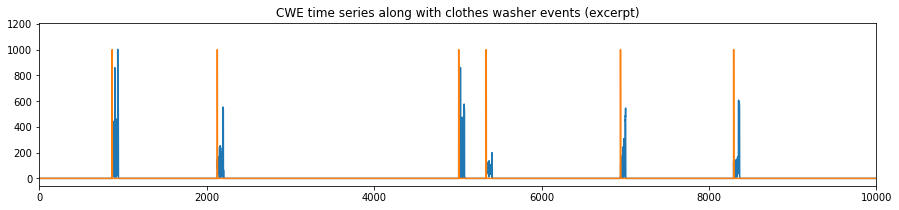

In [9]:
ampds = pd.read_csv('Electricity_P.csv')
ampds = ampds.drop('UNIX_TS', axis=1)

# Extract clothes washer events. A clothes washer event occurs whenever there is non-zero
# electricity consumption on the CWE meter preceded by at least 10 minutes of zero consumption.
es = ampds['CWE'].rolling(11).apply(lambda x: (x[0:10].sum() == 0) & (x[10]>0), raw=True).fillna(0.0).values

print('number of events: %d' % es.sum())
print('length of time series: %d' % ampds.shape[0])

plt.figure(figsize=(15,3))
plt.plot(ampds['CWE'])
plt.plot(es*1000)
plt.xlim(0,10000)
plt.title('CWE time series along with clothes washer events (excerpt)')
plt.show()

## EITEST-KS
Terminates within a few seconds.

In [11]:
start_time = time.time()
K = 120
for meter in ampds.columns:
    ts = ampds[meter].values.astype(float)
    sample = eitest.obtain_samples(es, ts, lag_cutoff=K, instantaneous=True, sort=True)
    tstats, pvals = eitest.pairwise_twosample_tests(sample, 'ks', min_pts=2)
    pvals_adj = eitest.multitest(np.sort(pvals[~np.isnan(pvals)]), 'simes')
    print('EITEST-KS %s %.4f' % (meter, pvals_adj.min()))
print("time elapsed: %.2f secs" % (time.time()-start_time))

EITEST-KS WHE 0.0000
EITEST-KS RSE 1.0000
EITEST-KS GRE 1.0000
EITEST-KS MHE 0.0000
EITEST-KS B1E 1.0000
EITEST-KS BME 0.8629
EITEST-KS CWE 0.0000
EITEST-KS DWE 1.0000
EITEST-KS EQE 1.0000
EITEST-KS FRE 1.0000
EITEST-KS HPE 1.0000
EITEST-KS OFE 1.0000
EITEST-KS UTE 1.0000
EITEST-KS WOE 1.0000
EITEST-KS B2E 0.0045
EITEST-KS CDE 0.0000
EITEST-KS DNE 1.0000
EITEST-KS EBE 1.0000
EITEST-KS FGE 1.0000
EITEST-KS HTE 0.0000
EITEST-KS OUE 0.0000
EITEST-KS TVE 1.0000
EITEST-KS UNE 0.0084
time elapsed: 15.15 secs


## EITEST-MMD
Terminates within 20 minutes.

In [13]:
start_time = time.time()
K = 120
for meter in ampds.columns:
    ts = ampds[meter].values.astype(float)
    sample = eitest.obtain_samples(es, ts, lag_cutoff=K, instantaneous=True, sort=False)
    tstats, pvals = eitest.pairwise_twosample_tests(sample, 'mmd', min_pts=2)
    pvals_adj = eitest.multitest(np.sort(pvals[~np.isnan(pvals)]), 'simes')
    print('EITEST-MMD %s %.4f' % (meter, pvals_adj.min()))
print("time elapsed: %.2f secs" % (time.time()-start_time))

EITEST-MMD WHE 0.0000
EITEST-MMD RSE 0.9721
EITEST-MMD GRE 0.8754
EITEST-MMD MHE 0.0000
EITEST-MMD B1E 0.9819
EITEST-MMD BME 0.0000
EITEST-MMD CWE 0.0000
EITEST-MMD DWE 0.9759
EITEST-MMD EQE 0.0119
EITEST-MMD FRE 0.9998
EITEST-MMD HPE 0.0152
EITEST-MMD OFE 0.6240
EITEST-MMD UTE 0.0074
EITEST-MMD WOE 0.9340
EITEST-MMD B2E 0.0000
EITEST-MMD CDE 0.0000
EITEST-MMD DNE 0.9728
EITEST-MMD EBE 0.0562
EITEST-MMD FGE 0.9313
EITEST-MMD HTE 0.0000
EITEST-MMD OUE 0.0000
EITEST-MMD TVE 0.3944
EITEST-MMD UNE 0.0004
time elapsed: 1051.41 secs
